# SIEMENS
# (Machine Learning)
Author: Aman Kumar Jain                                                                
 Email: jainamandelhi@gmail.com

Contact: 9810900824

College: Delhi Technological University     

Code Link:https://drive.google.com/open?id=1_75azB0rSWuJkUda86FNjEz-T9xVaQCC

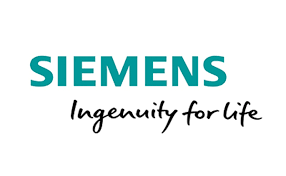

In [1]:
from PIL import Image
im = Image.open('download.png')
from io import BytesIO
buffer = BytesIO()
im.save(buffer, format='png')
im

..............................................................................................................................

# 1.	INTRODUCTION
The project is about analyzing a power plant dataset and finding the best fit component among the dataset to tag the value. Aim of the project is to make this tagging accurate and quick. Statistical concepts are used. Code is written in python.


# 2. OVERVIEW
The dataset is first cleaned and studied. Then the components are segregated into separate lists based on the classes they belong to. For ex all the components describing temperature are pushed into one list, pressure ones are pushed into another list and so on. Units of the classes are converted according to the need and Student’s t-test is applied after taking the data as close to normality to find the suitable tag. 

 ##### Statistical concepts used- mean, variance, range, skewness, kurtosis, parametric and non-parametric tests, normality, student’s t-test, t-statistic, p-value etc.
 
 Fig 1 is the histogram representation of the data of "MAIN STEAM PRESS 2". Fig 2 is obtained after removing the noise and unwanted data from Fig 1 to take data close to normality as much as possible for applying suitable test.

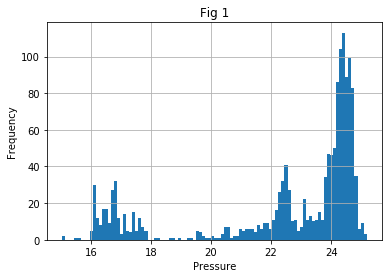

In [18]:

import matplotlib.pyplot as plt
value=27
var=dataset[MPa[0]]
var.hist(bins=100)
plt.title('Fig 1')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

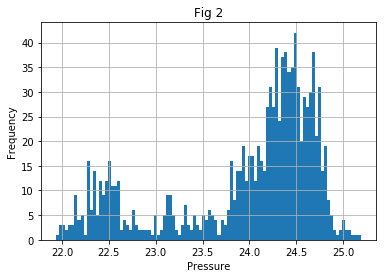

In [19]:
var=dataset[MPa[0]]
var_range=(float(max(var))-float(min(var)))
var_range/=2
var=var[(var>value-var_range) & (var<value+var_range)]
var.hist(bins=100)
plt.title('Fig 2')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

## 3. DATASET
The dataset is provided by Siemens. It is about a powerplant in which rows are the time and columns are the components of the power plant.


There are missing values and string values (0?) which are cleaned and taken care of. Some of the numeric values are saved as string which are converted into float and some entities have incorrect values which are not considered in the analysis.

The dataset gives the values of all the components (213 columns) taken at every minute in a day ( 1446 rows). There are total 307,998 instances.



..................................................................................................................................

# NOTE: RUN 4-7 ONLY ONCE FOR ONE DATASET AS THEY TAKE 15-20 MINUTES TO COMPILE. 

....................................................................................................................................

## 4. IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as scs
from scipy.stats import kurtosis, skew

## 5. READ THE DATASET

In [5]:
dataset=pd.read_csv('project.csv')


## 6. REPLACE THE UNWANTED VALUES WITH NaN

In [6]:
def func (dataset):
    for i in range(0,1445):
        for j in range(1,212):
            if (type(dataset.iloc[i,j])==str):
                dataset=dataset.replace(dataset.iloc[i,j], np.nan)
    return dataset

dataset=func(dataset)

## 7. CONVERT NUMERIC STRING VALUES TO FLOAT

In [7]:

def func1 (dataset):
    for i in range(0,1445):
        for j in range(1,212):
            dataset.iloc[i,j]=float(dataset.iloc[i,j])
    return dataset

dataset=func1(dataset)


## 8. SEGREGATE ENTITIES BASED ON THEIR RESPECTIVE CLASSES

In [8]:
headers=list(dataset.columns.values)
rpm=[]
MW=[]
Thr=[]
MPa=[]
perc=[]
temperature=[]
Pa=[]
A=[]
V=[]
mm=[]
def seggregate(features_list):
    p=0
    for i in range(len(features_list)):
        x = ''
        y = ''
        z = ''
        w = ''
        if (len(features_list[p].split("("))==2):
            y,z=features_list[p].split("(")
            
        elif(len(features_list[p].split("("))==3):
            x,y,z=features_list[p].split("(")
        
        elif(len(features_list[p].split("("))==4):
            w,x,v,z=features_list[p].split("(")
        
        else:
            p=p+1
            continue  
        
        if(z=='rpm)'):
            rpm.append(features_list[p])
            features_list.pop(p)
     
        if(z=='MW)' or z=='MW).1' or z=='Mvar)'):
            MW.append(features_list[p])
            features_list.pop(p)

        if(z=='T/hr)' or z=='T/hr).1' or z=='T/hr) '):
            Thr.append(features_list[p])
            features_list.pop(p)
         
        if(z=='MPa)' or z=='Mpa)'):
            MPa.append(features_list[p])
            features_list.pop(p)
         
        if(z=='%)'):
            perc.append(features_list[p])
            features_list.pop(p)
           
        if(z=='Ce)' or z=='Centigrade)' or z=='GENERATOR END) (Ce)' or  z=='Ce).1' or z==' Ce)' or z=='C)'):
            temperature.append(features_list[p])
            features_list.pop(p)
           
        if(z=='Pa)' or z=='TURBINE END) (Pa)' or z=='Pa).1' or z=='pa)'):
            Pa.append(features_list[p])
            features_list.pop(p)
            
        if(z=='A)'):
            A.append(features_list[p])
            features_list.pop(p)

        if(z=='V)'):
            V.append(features_list[p])
            features_list.pop(p)
          
        if(z=='mm)'):
            mm.append(features_list[p])
            features_list.pop(p)

seggregate(headers)

## 9. FUNCTION FOR T-TEST TO FIND THE BEST FIT ATTRIBUTE

In [9]:
def t_test(sample, mu):
    mean = np.mean(sample)
    var = np.var(sample, ddof = 1) 
    sem = (var / len(sample)) ** .5
    t = abs(mu - mean)/sem
    df = len(sample) - 1
    p = 2*(1-scs.t.cdf(t, df))
    return (t, p)

## 10. CONVERT THE UNITS
Temperature units ( Fahrenheit, Celcius, Kelvin) and Pressure units (Pascal, MPa, KPa, Torr, T/hr, ATM, Bar) are converted into each other.


In [10]:
def KELtoCEL(value):
    return value-273.15

def CELtoKEL(value):
    return value+273.15

def CELtoFAR(value):
    return(9*value/5)+32

def FARtoCEL(value):
    return 5*(value-32)/9

def FARtoKEL(value):
    value=FARtoCEL(value)
    return CELtoKEL(value)

def KELtoFAR(value):
    value=KELtoCEL(value)
    return CELtoFAR(value)

def PAStoBAR(value):
    return (value)/100000

def PAStoATM(value):
    value=PAStoBAR(value)
    return BARtoATM(value)

def PAStoTOR(value):
    value=PAStoBAR(value)
    return BARtoTOR(value)

def PAStoMPA(value):
    return value/1000000

def PAStoKPA(value):
    return value/1000

def PAStoKGC(value):
    return value*1.0197/100000

def ATMtoBAR(value):
    return  value*1.01325

def ATMtoPAS(value):
    return value*101325

def ATMtoTOR(value):
    return value*760

def ATMtoMPA(value):
    value=ATMtoPAS(value)
    return PAStoMPA(value)

def ATMtoKPA(value):
    value=ATMtoPAS(value)
    return PAStoKPA(value)

def ATMtoKGC(value):
    value=ATMtoPAS(value)
    return PAStoKGC(value)

def BARtoATM(value):
    return value/1.01325

def BARtoPAS(value):
    value=BARtoATM(value)
    return ATMtoPAS(value)

def BARtoTOR(value):
    value=BARtoATM(value)
    return ATMtoTOR(value)

def BARtoMPA(value):
    value=BARtoPAS(value)
    return PAStoMPA(value)

def BARtoKPA(value):
    value=BARtoPAS(value)
    return PAStoKPA(value)

def BARtoKGC(value):
    value=BARtoPAS(value)
    return PAStoKGC(value)

def MPAtoPAS(value):
    return value*1000000

def MPAtoATM(value):
    value=MPAtoPAS(value)
    return PAStoATM(value)

def MPAtoTOR(value):
    value=MPAtoPAS(value)
    return PAStoTOR(value)

def MPAtoBAR(value):
    value=MPAtoPAS(value)
    return PAStoBAR(value)

def MPAtoKPA(value):
    return value/1000

def MPAtoKGC(value):
    value=MPAtoPAS(value)
    return PAStoKGC(value)

def KPAtoPAS(value):
    return value*1000

def KPAtoATM(value):
    value=KPAtoPAS;
    return PAStoATM(value)

def KPAtoTOR(value):
    value=KPAtoPAS(value)
    return PAStoTOR(value)

def KPAtoMPA(value):
    return value/1000

def KPAtoBAR(value):
    value=KPAtoPAS(value)
    return PAStoBAR(value)

def KPAtoKGC(value):
    value=KPAtoPAS(value)
    return PAStoKGC(value)

def KGCtoPAS(value):
    return value*98066.5

def KGCtoMPA(value):
    value=KGCtoPAS(value)
    return PAStoMPA(value)

def KGCtoKPA(value):
    value=KGCtoPAS(value)
    return PAStoKPA(value)

def KGCtoBAR(value):
    value=KGCtoPAS(value)
    return PAStoBAR(value)

def KGCtoATM(value):
    value=KGCtoPAS(value)
    return PAStoATM(value)

def KGCtoTOR(value):
    value=KGCtoPAS(value)
    return PAStoTOR(value)

def TORtoPAS(value):
    return value*133.322

def TORtoMPA(value):
    value=TORtoPAS(value)
    return PAStoMPA(value)

def TORtoKPA(value):
    value=TORtoPAS(value)
    return PAStoKPA(value)

def TORtoBAR(value):
    value=TORtoPAS(value)
    return PAStoBAR(value)

def TORtoATM(value):
    value=TORtoPAS(value)
    return PAStoATM(value)

def TORtoKGC(value):
    value=TORtoPAS(value)
    return PAStoKGC(value)

def temp(ini,fin,value):
    if(ini=='KEL'):
        if(fin=='FAR'):
            return KELtoFAR(value)
        else:
            return KELtoCEL(value)  
    elif(ini=='CEL'):
        if(fin=='FAR'):
            return CELtoFAR(value)
        else:
            return CELtoKEL(value)
    elif(ini=='FAR'):
        if(fin=='CEL'):
            return FARtoCEL(value)
        else:
            return FARtoKEL(value)

def press(ini,fin,value):
    
    if(ini=='PAS'):
        if(fin=='KPA'):
            return PAStoKPA(value)
        elif(fin=='MPA'):
            return PAStoMPA(value)
        elif(fin=='BAR'):
            return PAStoBAR(value)
        elif(fin=='ATM'):
            return PAStoATM(value)
        elif(fin=='TOR'):
            return PAStoTOR(value)
        else:
            return PAStoKGC(value)
    
    elif(ini=='KPA'):
        if(fin=='PAS'):
            return KPAtoPAS(value)
        elif(fin=='MPA'):
            return KPAtoMPA(value)
        elif(fin=='BAR'):
            return KPAtoBAR(value)
        elif(fin=='ATM'):
            return KPAtoATM(value)
        elif(fin=='TOR'):
            return KPAtoTOR(value)
        else:
            return KPAtoKGC(value)
    
    elif(ini=='MPA'):
        if(fin=='PAS'):
            return MPAtoPAS(value)
        elif(fin=='KPA'):
            return MPAtoKPA(value)
        elif(fin=='BAR'):
            return MPAtoBAR(value)
        elif(fin=='ATM'):
            return MPAtoATM(value)
        elif(fin=='TOR'):
            return MPAtoTOR(value)
        else:
            return MPAtoKGC(value)
    
    elif(ini=='BAR'):
        if(fin=='PAS'):
            return BARtoPAS(value)
        elif(fin=='KPA'):
            return BARtoKPA(value)
        elif(fin=='MPA'):
            return BARtoMPA(value)
        elif(fin=='ATM'):
            return BARtoATM(value)
        elif(fin=='TOR'):
            return BARtoTOR(value)
        else:
            return BARtoKGC(value)
    
    elif(ini=='ATM'):
        if(fin=='PAS'):
            return ATMtoPAS(value)
        elif(fin=='KPA'):
            return ATMtoKPA(value)
        elif(fin=='MPA'):
            return ATMtoMPA(value)
        elif(fin=='BAR'):
            return ATMtoBAR(value)
        elif(fin=='TOR'):
            return ATMtoTOR(value)
        else:
            return ATMtoKGC(value)
    
    elif(ini=='TOR'):
        if(fin=='PAS'):
            return TORtoPAS(value)
        elif(fin=='KPA'):
            return TORtoKPA(value)
        elif(fin=='MPA'):
            return TORtoMPA(value)
        elif(fin=='ATM'):
            return TORtoATM(value)
        elif(fin=='BAR'):
            return TORtoBAR(value)
        else:
            return TORtoKGC(value)
    
    elif(ini=='KGC'):
        if(fin=='PAS'):
            return KGCtoPAS(value)
        elif(fin=='KPA'):
            return KGCtoKPA(value)
        elif(fin=='MPA'):
            return KGCtoMPA(value)
        elif(fin=='BAR'):
            return KGCtoBAR(value)
        elif(fin=='ATM'):
            return KGCtoATM(value)
        else:
            return KGCtoTOR(value)


## 11. MAIN FUNCTION DOING THE ANALYSIS

In [11]:
def find(value,unit_func,dataset_unit,find_unit):
    if(dataset_unit != find_unit):
        if(unit_func==temperature):
            value=temp(find_unit,dataset_unit,value)
    var_range=0.0
    t_final=100000000.0
    i_final=0.0
    p=0.0
    for i in range(len(unit)):
        var=dataset[unit[i]]
        if (pd.isna(max(var))):
            continue
        var_range=(float(max(var))-float(min(var)))
        var_range/=2
        var=var[(var>value-var_range) & (var<value+var_range)]
        if(len(var)==0):
            continue
        t_value,p_value=t_test(var,value)
        if(t_value<t_final):
            t_final=t_value
            i_final=i
            p=p_value
    return i_final,t_final,p

## NOTE: ONLY RUN 12 TO FIND THE REQUIRED TAG

## 12. SOLUTION 
#### CHANGE THE VALUE, DATASET_UNIT, FIND_UNIT AND UNIT TO OBTAIN THE RESULT. BELOW IS AN EXAMPLE.

In [27]:
value=326.88
dataset_unit='CEL'
find_unit='CEL'
unit=temperature
unit[find(value,unit,dataset_unit,find_unit)[0]]


'COLD REHEAT STEAM PIPE TOP METAL TEMP (Ce)'

In [28]:
find(value,unit,dataset_unit,find_unit)

(4, 3.037811739827918, 0.0024260406531182444)

## Above obtained result tells that it can be said with 99.76% confidence that 326.88 C temperature will be of 'COLD REHEAT STEAM PIPE TOP METAL TEMP'.

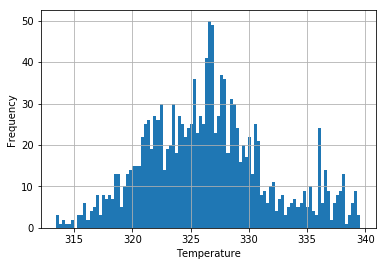

In [42]:
value=326.88
var=dataset[temperature[4]]
var_range=(float(max(var))-float(min(var)))
var_range/=2
var=var[(var>value-var_range) & (var<value+var_range)]
var.hist(bins=100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


##### Such high confidence is obtained as the data is quite close to normal distribution.
#### KURTOSIS= -0.21  SKEWNESS=0.46
#### NORMAL DISTRIBUTION HAS KURTOSIS AND SKEWNESS EQUAL TO ZERO.